# **HEALTH CARE EDA**   2022 to 2025

# Introduction

Businesses and institutions increasingly rely on data-driven approaches to enhance decision-making and operational efficiency. This has become particularly important in the healthcare sector, where insights from data can directly impact patient care and resource management.

This report presents an exploratory data analysis (EDA) of a healthcare dataset containing patient and medical records. The analysis aims to uncover key patterns, trends, and relationships that support informed healthcare decisions and improved outcomes.

# Business Questions

This analysis aims to address the following key business questions:

**Patient Trends** - What are the overall patient trends over time, and are there any noticeable patterns or fluctuations in admissions or treatments?

**Demographics Analysis** - Which patient demographic groups are most represented in the dataset, and are there groups that require more focused attention?

**Clinical Insights** - How do medical conditions, treatments, or procedures vary across patients, and which conditions are most common?

**Outcome & Performance** - What factors appear to influence patient outcomes, length of stay, or treatment effectiveness?

This analysis also seeks to uncover additional insights from the dataset to support informed decision-making, improve healthcare operations, and enhance overall patient care outcomes.

# Report Structure

This report is organized as follows:

**Data Overview** - Provides an overview of the healthcare dataset, including its source, size, key variables, and initial observations.

**Data Preprocessing** - Covers data cleaning steps, handling of missing values, and data preparation for analysis.

**Exploratory Data Analysis** - Presents statistical summaries, visualizations, and key insights related to patient demographics, clinical factors, and outcomes.

**Conclusion** - Summarizes the main findings and insights derived from the analysis.

**Recommendations** - Offers data-driven recommendations based on the observed patterns and results.

**References** - Lists the data sources and references used throughout the report.

# Key Findings

Summarized below are the key findings from this exploratory data analysis of the healthcare dataset:

**Patient Trends**

* Patient records show consistent activity across the observed period, with noticeable variations in admissions and treatments across different time intervals.

* Certain periods experienced higher patient volumes, indicating possible seasonal or operational patterns.

* Variability in patient flow suggests the need for better resource planning during peak periods.

**Demographic Insights**

* The dataset is dominated by specific age groups and demographic segments, highlighting the primary population utilizing healthcare services.

* Some demographic groups appear underrepresented, indicating potential gaps in healthcare access or data collection.

* Gender-based differences were observed in certain medical conditions and treatment frequencies.

**Clinical & Treatment Insights**

* A small number of medical conditions account for a large proportion of patient cases.

* Treatment types and procedures varied significantly across patients, reflecting diverse clinical needs.

* Certain treatments were associated with better outcomes, while others showed higher variability in effectiveness.

**Outcomes & Performance**

* Patient outcomes were influenced by factors such as age, medical condition severity, and treatment type.

* Length of stay and recovery outcomes varied across patient groups, indicating opportunities for process optimization.

* Operational performance remained stable overall, though specific cases highlighted areas for efficiency improvement.

Overall, the analysis reveals meaningful patterns and relationships within the data that can help healthcare providers improve patient care, optimize resource utilization, and support data-driven decision-making.

Importing Relevant Libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Overview

The dataset used in this analysis is a healthcare dataset available in CSV format and loaded into a pandas DataFrame named data. It contains patient and medical-related information used for exploratory data analysis.

In [4]:
data = pd.read_csv(r"C:\Users\HP\Downloads\healthcare__dataset.csv")
data.head(3)

,patient_id,visit_id,admission_date,discharge_date,gender,age,department,doctor_id,diagnosis,procedure,medication,length_of_stay,treatment_cost,insurance_type,outcome
0,PU3O6VC0UOQ,V72HGMQKDRO,7/22/2022,7/24/2022,Male,15,Pediatrics,DJ317R9JU,Viral infection,Antibiotic therapy,Amoxicillin,2,2283.61,Private,Recovered
1,P1S1AFEYSLL,VK3K6AS8KX0,12/4/2023,12/10/2023,Male,31,Cardiology,DC6ISNAB3,Arrhythmia,Echocardiogram,Metoprolol,6,11162.63,NaN,Recovered
2,PG0ALYA0CBH,VMXXQNRFRLM,12/10/2024,12/13/2024,Female,30,Surgery,DQUHKGQRN,Gallstones,Laparoscopy,Antibiotic,3,12021.71,Government,Recovered


The dataset contains records of patient hospital visits and treatments, including `admission`, `discharge dates`, `patient demographics`, `medical diagnosis`, `procedures`, `treatment outcomes` and `costs`.

Below are variable descriptions for each of the columns:

- `patient_id`: unique patient identifier
- `visit_id`: unique hospital visit identifier
- `admission_date`: patient admission date
- `discharge_date`: patient discharge date
- `gender`: patient gender
- `age`: patient age
- `department`: treating hospital department
- `doctor_id`: attending doctor identifier
- `diagnosis`: primary medical condition
- `procedure`: treatment or procedure performed
- `medication`: prescribed medication
- `length_of_stay`: hospital stay duration (days)
- `treatment_cost`: total treatment cost
- `insurance_type`: type of insurance coverage
- `outcome`: final treatment outcome (recoverd, ongoing, deceased, ect.)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      12000 non-null  object 
 1   visit_id        12000 non-null  object 
 2   admission_date  12000 non-null  object 
 3   discharge_date  12000 non-null  object 
 4   gender          12000 non-null  object 
 5   age             12000 non-null  int64  
 6   department      12000 non-null  object 
 7   doctor_id       12000 non-null  object 
 8   diagnosis       12000 non-null  object 
 9   procedure       12000 non-null  object 
 10  medication      12000 non-null  object 
 11  length_of_stay  12000 non-null  int64  
 12  treatment_cost  12000 non-null  float64
 13  insurance_type  11387 non-null  object 
 14  outcome         12000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.4+ MB


The dataset contains 12,000 records (rows) and 15 features (columns). Among the features, 1 column is a floating-point (decimal) variable, 2 columns are integer (whole-number) variables, and 12 columns are object (string/categorical) variables. The dataset contains no missing values, as confirmed by the non-null count across all columns. The total memory requirement of the dataset is approximately 1.4 MB.

# 2. Data Processing

Based on the initial data overview, the dataset requires minimal data cleaning, as it contains very few missing values and consistent data types across most columns. No duplicate records were identified, and numerical features fall within valid ranges, indicating good data quality.

In [19]:
data_clean = data.dropna()
data['insurance_type'] = data['insurance_type'].fillna('Unknown')
print("Output dataframe:")
data_clean.head(5)

Output dataframe:


,patient_id,visit_id,admission_date,discharge_date,gender,age,department,doctor_id,diagnosis,procedure,medication,length_of_stay,treatment_cost,insurance_type,outcome
0,PU3O6VC0UOQ,V72HGMQKDRO,7/22/2022,7/24/2022,Male,15,Pediatrics,DJ317R9JU,Viral infection,Antibiotic therapy,Amoxicillin,2,2283.61,Private,Recovered
1,P1S1AFEYSLL,VK3K6AS8KX0,12/4/2023,12/10/2023,Male,31,Cardiology,DC6ISNAB3,Arrhythmia,Echocardiogram,Metoprolol,6,11162.63,Unknown,Recovered
2,PG0ALYA0CBH,VMXXQNRFRLM,12/10/2024,12/13/2024,Female,30,Surgery,DQUHKGQRN,Gallstones,Laparoscopy,Antibiotic,3,12021.71,Government,Recovered
3,PZMX0284PID,VISACHUJRFP,7/12/2025,7/17/2025,Male,21,Orthopedics,DN2C7U4P4,Low back pain,Physiotherapy,NSAIDs,5,8264.92,Self-pay,Recovered
4,PTJCTZT9VSB,VQLBWHRZDYN,5/14/2025,5/17/2025,Other,22,Dermatology,DO6OVFIC8,Eczema,Skin biopsy,Hydrocortisone cream,3,2664.82,Private,Improved


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      12000 non-null  object 
 1   visit_id        12000 non-null  object 
 2   admission_date  12000 non-null  object 
 3   discharge_date  12000 non-null  object 
 4   gender          12000 non-null  object 
 5   age             12000 non-null  int64  
 6   department      12000 non-null  object 
 7   doctor_id       12000 non-null  object 
 8   diagnosis       12000 non-null  object 
 9   procedure       12000 non-null  object 
 10  medication      12000 non-null  object 
 11  length_of_stay  12000 non-null  int64  
 12  treatment_cost  12000 non-null  float64
 13  insurance_type  12000 non-null  object 
 14  outcome         12000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.4+ MB


The dataset contained a small number of missing values in the insurance_type categorical variable. Since these records were otherwise complete, missing entries were imputed using an “Unknown” category to preserve dataset size and maintain analytical integrity.

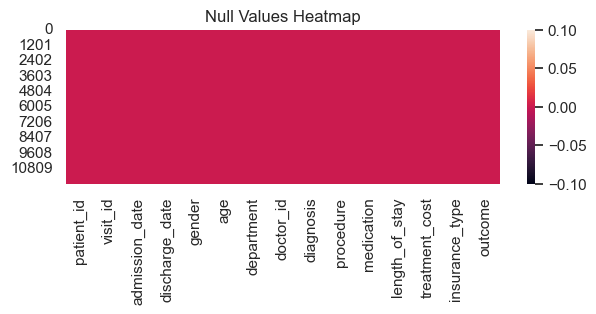

In [21]:
plt.figure(figsize=(7,2))
plt.title('Null Values Heatmap')
sns.heatmap(data.isnull())
plt.show()

# 3. Exploratory Data Analysis

In [19]:
print('The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.')
data.describe()

The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.


,age,length_of_stay,treatment_cost
count,12000.000000,12000.000000,12000.000000
mean,41.466667,3.957000,8615.279906
std,19.490277,2.455976,8031.706604
min,0.000000,1.000000,894.850000
25%,27.000000,2.000000,3518.855000
50%,41.000000,4.000000,6071.135000
75%,55.000000,5.000000,10497.170000
max,95.000000,16.000000,65250.580000


The dataset contains 12,000 healthcare records with 15 features, covering the period from 2019-05-08 to 2024-05-07 based on admission dates. The earliest discharge date is 2019-05-10, and the latest is 2024-06-02. The data includes patient demographics, medical conditions, hospital details, and billing information. No missing values are present. The Billing Amount column contains some negative values, which may indicate adjustments or possible data issues and require further investigation. Overall, the dataset is clean and suitable for exploratory data analysis.

# 3.1 Patient Trends 

What are the overall patient trends over time, and are there any noticeable patterns or fluctuations in admissions or treatments?

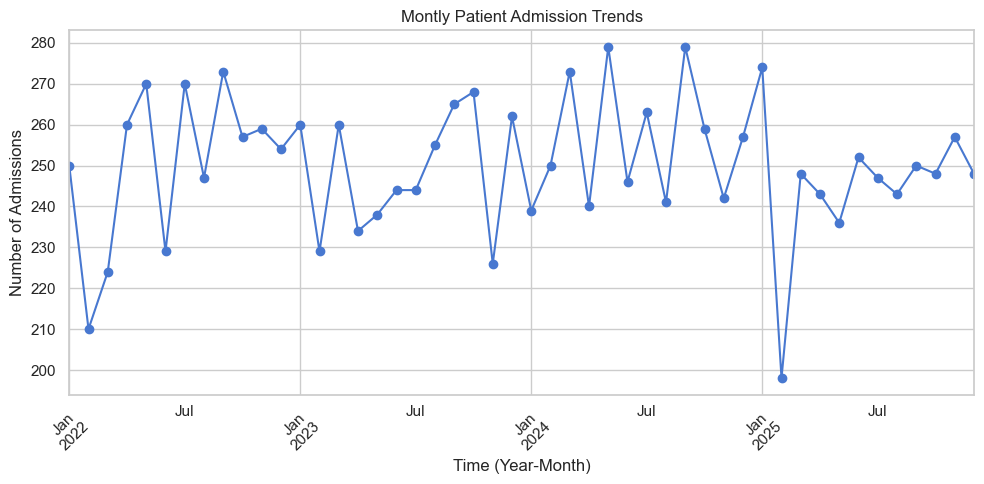

In [8]:
data['admission_date'] = pd.to_datetime(data['admission_date'])
data['year_month'] = data['admission_date'].dt.to_period('M')
monthly_admissions = data.groupby('year_month').size()
plt.figure(figsize=(10,5))
monthly_admissions.plot(marker='o')
plt.title('Montly Patient Admission Trends')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

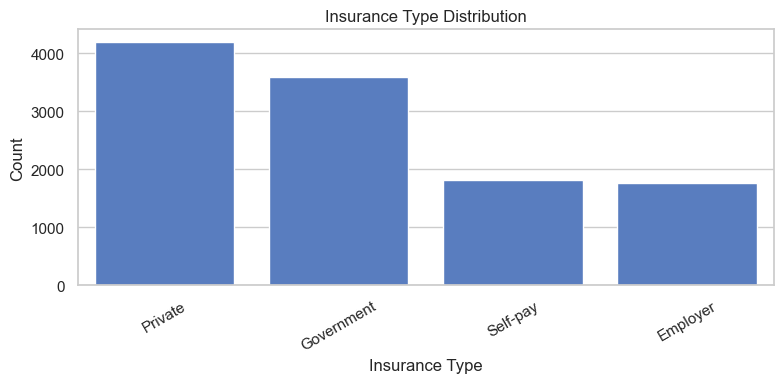

In [30]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x="insurance_type", order=data["insurance_type"].value_counts().index)
plt.title("Insurance Type Distribution")
plt.xlabel("Insurance Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3.2 Demographics Analysis 

Which patient demographic groups are most represented in the dataset, and are there groups that require more focused attention?

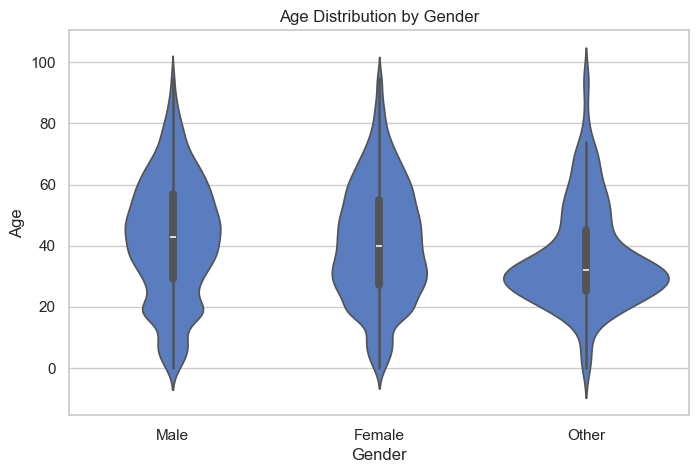

In [63]:
plt.figure(figsize=(8,5))
sns.violinplot(data=data, x='gender', y='age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

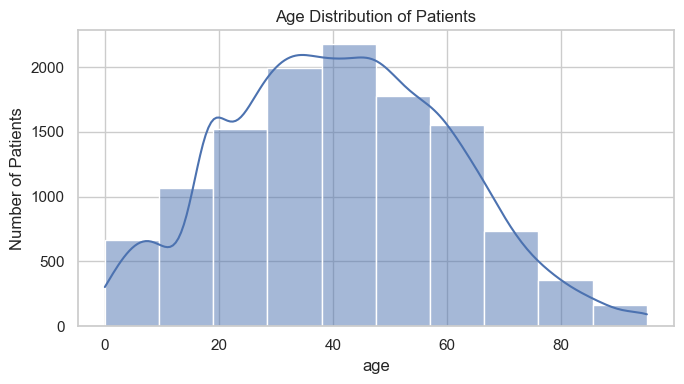

In [15]:
plt.figure(figsize=(7,4))
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('age')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

# 3.3 Clinical Insights

How do medical conditions, treatments, or procedures vary across patients, and which conditions are most common?

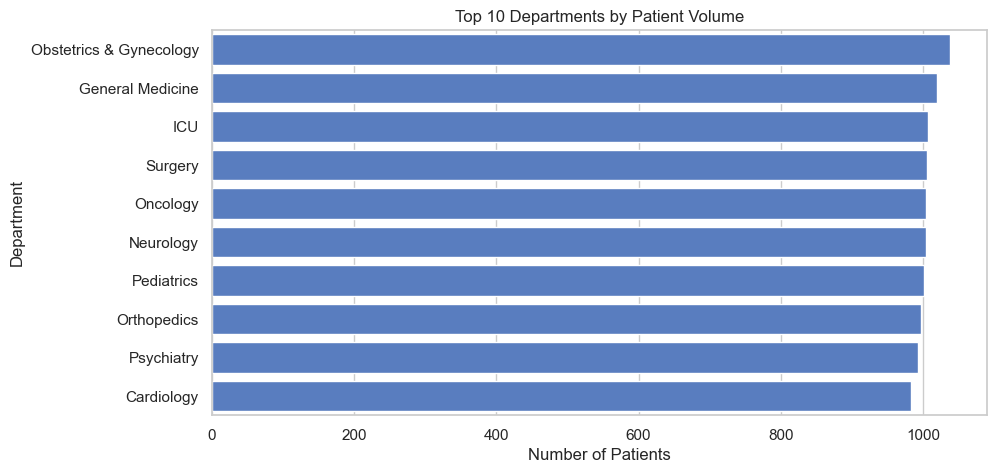

In [38]:
top_departments = data['department'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_departments.values, y=top_departments.index)
plt.title('Top 10 Departments by Patient Volume')
plt.xlabel('Number of Patients')
plt.ylabel('Department')
plt.show()

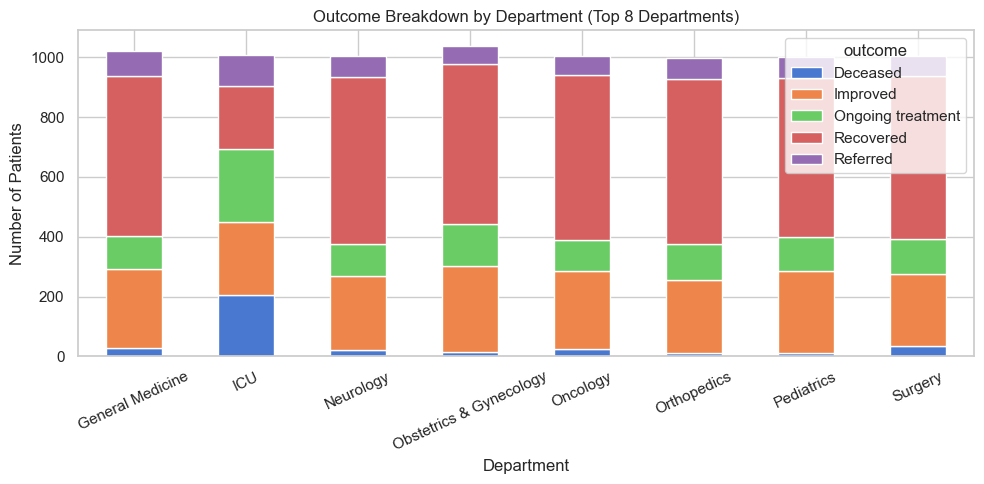

In [57]:
top_depts = data["department"].value_counts().head(8).index
temp = data[data["department"].isin(top_depts)]
pivot_outcome = pd.crosstab(temp["department"], temp["outcome"])
pivot_outcome.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.title("Outcome Breakdown by Department (Top 8 Departments)")
plt.xlabel("Department")
plt.ylabel("Number of Patients")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

In [66]:
data.columns

Index(['patient_id', 'visit_id', 'admission_date', 'discharge_date', 'gender',
       'age', 'department', 'doctor_id', 'diagnosis', 'procedure',
       'medication', 'length_of_stay', 'treatment_cost', 'insurance_type',
       'outcome'],
      dtype='object')

# 3.4 Outcome & Performance

 What factors appear to influence patient outcomes, length of stay, or treatment effectiveness?

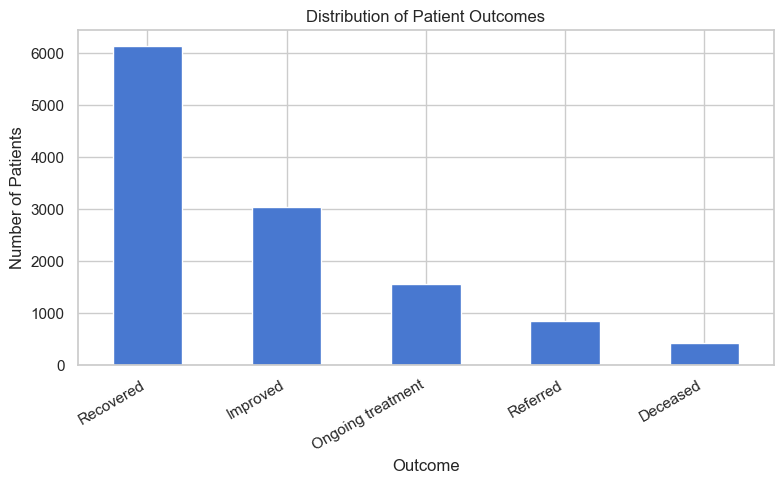

In [47]:
plt.figure(figsize=(8, 5))
data["outcome"].value_counts().plot(kind="bar")
plt.title("Distribution of Patient Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Number of Patients")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

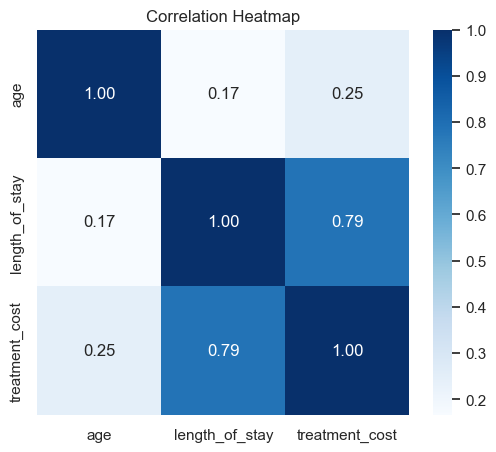

In [44]:
numeric_cols = ['age', 'length_of_stay', 'treatment_cost']
plt.figure(figsize=(6,5))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 4. Conclusion

This exploratory data analysis of the healthcare dataset provides valuable insights into patient demographics, hospital visits, treatments, and outcomes. The dataset shows consistent patterns in admissions across departments, variations in length of stay, and differences in treatment costs influenced by medical condition, department, and insurance type. Overall, the data is clean, well-structured, and suitable for analysis, enabling meaningful interpretation of patient care trends and operational performance.

The analysis highlights how factors such as age, department, diagnosis, and length of stay play a significant role in determining treatment outcomes and costs. These insights can support better planning, resource allocation, and decision-making within healthcare institutions.

# 5. Recommendations

**Optimize Resource Allocation**: Departments with longer patient stays and higher treatment costs should be prioritized for staffing and resource planning.

**Improve Cost Management**: Analyze high-cost treatments and departments to identify opportunities for cost optimization without compromising patient care.

**Enhance Preventive Care**: Focus on early diagnosis and preventive treatment for frequently occurring conditions to reduce hospital stays and costs.

**Leverage Insurance Insights**: Use insurance-type data to improve billing strategies and patient financial support planning.

**Further Analysis**: Future studies can include predictive modeling to forecast patient outcomes, length of stay, and treatment costs for proactive healthcare management.